<a href="https://colab.research.google.com/github/AtulAravindDas/MYMLDLDAPROJECTS/blob/main/LENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **German Traffic Sign Classification using LENET**

The 43 distinct labels are as follows
<ol start="0">
<li>Speed Limit(20km/hr)</li>
<li>Speed Limit(30km/hr)</li>
<li>Speed Limit(50km/hr)</li>
<li>Speed Limit(60km/hr)</li>
<li>Speed Limit(70km/hr)</li>
<li>Speed Limit(80km/hr)</li>
<li>End of Speed Limit(80km/hr)</li>
<li>Speed Limit(100km/hr)</li>
<li>Speed Limit(120km/hr)</li>
<li>No passing</li>
<li>No passing for vehicles>3.5 metric tons</li>
<li>Right of way at next intersection</li>
<li>Priority road</li>
<li>Yield</li>
<li>Stop</li>
<li>No vehicles</li>
<li>Vehicles over 3.5 metric tons prohibited</li>
<li>No entry</li>
<li>General caution</li>
<li>Dangerous curve to the left</li>
<li>Dangerous curve to the right</li>
<li>Double curve</li>
<li>Bumpy road</li>
<li>Slippery road</li>
<li>Road narrows to the right</li>
<li>Road work</li>
<li>Traffic signals</li>
<li>Pedestrians</li>
<li>Children crossing</li>
<li>Bicycles crossing</li>
<li>Beware of ice/snow</li>
<li>Wild animals crossing</li>
<li>End of all speed and passing limits</li>
<li>Turn right ahead</li>
<li>Turn left ahead</li>
<li>Ahead only</li>
<li>Go straight or right</li>
<li>Go straight or left</li>
<li>Keep right</li>
<li>Keep left</li>
<li>Roundabout mandatory</li>
<li>End of no passing</li>
<li>End of no passing by vehicles>3.5 metric tonnes</li>
</ol>

## **Import Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #Implement binary protocols for serialization and deserialization thus ensuring the proper transfer of data among layers of the network

In [ ]:
train=pickle.load(open('/content/drive/MyDrive/Datasets/train.p','rb'))
test=pickle.load(open('/content/drive/MyDrive/Datasets/test.p','rb'))
validation=pickle.load(open('/content/drive/MyDrive/Datasets/valid.p','rb'))

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
test

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8),
 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ..

In [ ]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=validation['features'],validation['labels']
X_test,y_test=test['features'],test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

## **Data Exploration**

37

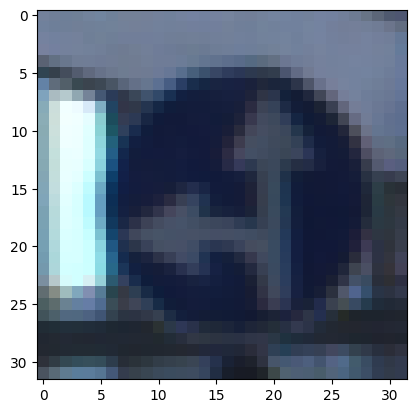

In [ ]:
i=5000
plt.imshow(X_train[i])
y_train[i]

17

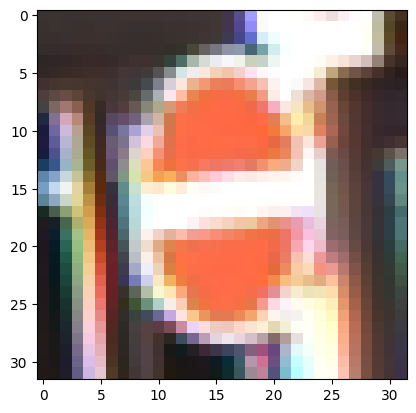

In [ ]:
i=4000
plt.imshow(X_validation[i])
y_validation[i]

7

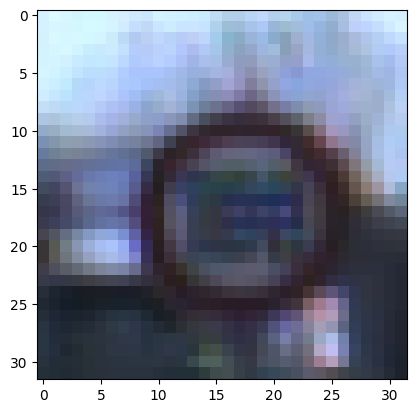

In [ ]:
i=3000
plt.imshow(X_validation[i])
y_validation[i]

34

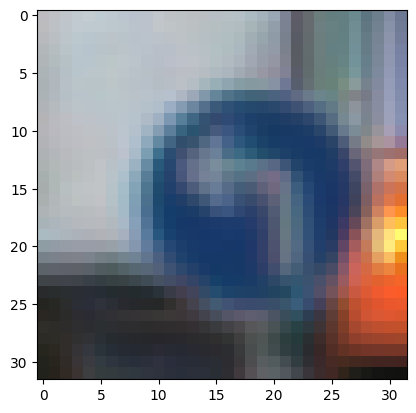

In [ ]:
i=2000
plt.imshow(X_test[i])
y_test[i]

11

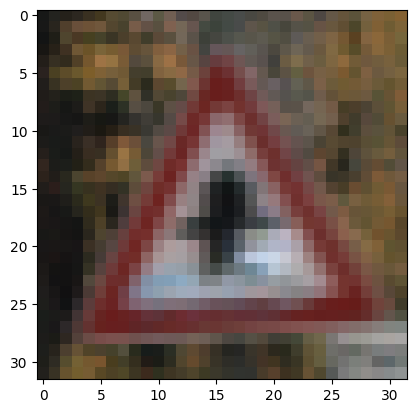

In [ ]:
i=3000
plt.imshow(X_test[i])
y_test[i]

## **Data Preparation**

Convert to grayscale and normalize the data

In [ ]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train) #Shuffle all the data(change in order thus improving training)

In [ ]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True) #Convert RGB to grayscale

In [ ]:
X_train_gray

array([[[[ 26.        ],
         [ 26.        ],
         [ 25.66666667],
         ...,
         [ 23.33333333],
         [ 25.33333333],
         [ 24.66666667]],

        [[ 21.66666667],
         [ 26.        ],
         [ 27.        ],
         ...,
         [ 24.66666667],
         [ 24.33333333],
         [ 26.66666667]],

        [[ 22.66666667],
         [ 26.66666667],
         [ 27.        ],
         ...,
         [ 25.66666667],
         [ 26.        ],
         [ 26.66666667]],

        ...,

        [[ 17.33333333],
         [ 18.        ],
         [ 20.33333333],
         ...,
         [ 21.33333333],
         [ 20.66666667],
         [ 23.33333333]],

        [[ 19.33333333],
         [ 21.33333333],
         [ 25.        ],
         ...,
         [ 20.66666667],
         [ 20.33333333],
         [ 24.66666667]],

        [[ 22.33333333],
         [ 24.66666667],
         [ 28.        ],
         ...,
         [ 20.66666667],
         [ 20.33333333],
         [ 27.   

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True) #Convert RGB to grayscale

In [ ]:
X_test_gray

array([[[[143.        ],
         [141.33333333],
         [142.66666667],
         ...,
         [118.33333333],
         [121.66666667],
         [106.66666667]],

        [[144.33333333],
         [143.        ],
         [144.33333333],
         ...,
         [146.        ],
         [144.66666667],
         [143.33333333]],

        [[144.        ],
         [144.66666667],
         [142.        ],
         ...,
         [147.66666667],
         [148.33333333],
         [146.66666667]],

        ...,

        [[140.33333333],
         [137.66666667],
         [138.66666667],
         ...,
         [140.33333333],
         [140.        ],
         [143.        ]],

        [[139.33333333],
         [138.66666667],
         [136.66666667],
         ...,
         [138.33333333],
         [139.33333333],
         [140.33333333]],

        [[138.        ],
         [136.33333333],
         [139.66666667],
         ...,
         [140.        ],
         [140.66666667],
         [141.333

In [ ]:
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True) #Convert RGB to grayscale

In [ ]:
X_validation_gray

array([[[[12.33333333],
         [11.66666667],
         [11.66666667],
         ...,
         [12.33333333],
         [12.        ],
         [11.66666667]],

        [[12.66666667],
         [11.66666667],
         [12.33333333],
         ...,
         [12.        ],
         [12.        ],
         [11.66666667]],

        [[12.66666667],
         [11.66666667],
         [12.        ],
         ...,
         [12.        ],
         [12.        ],
         [11.66666667]],

        ...,

        [[15.33333333],
         [14.33333333],
         [15.        ],
         ...,
         [12.33333333],
         [13.33333333],
         [13.33333333]],

        [[16.66666667],
         [15.66666667],
         [16.66666667],
         ...,
         [11.33333333],
         [12.33333333],
         [13.33333333]],

        [[17.66666667],
         [16.66666667],
         [17.66666667],
         ...,
         [12.        ],
         [13.        ],
         [14.33333333]]],


       [[[12.66666667],


In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

In [ ]:
X_train_gray_norm

array([[[[-0.796875  ],
         [-0.796875  ],
         [-0.79947917],
         ...,
         [-0.81770833],
         [-0.80208333],
         [-0.80729167]],

        [[-0.83072917],
         [-0.796875  ],
         [-0.7890625 ],
         ...,
         [-0.80729167],
         [-0.80989583],
         [-0.79166667]],

        [[-0.82291667],
         [-0.79166667],
         [-0.7890625 ],
         ...,
         [-0.79947917],
         [-0.796875  ],
         [-0.79166667]],

        ...,

        [[-0.86458333],
         [-0.859375  ],
         [-0.84114583],
         ...,
         [-0.83333333],
         [-0.83854167],
         [-0.81770833]],

        [[-0.84895833],
         [-0.83333333],
         [-0.8046875 ],
         ...,
         [-0.83854167],
         [-0.84114583],
         [-0.80729167]],

        [[-0.82552083],
         [-0.80729167],
         [-0.78125   ],
         ...,
         [-0.83854167],
         [-0.84114583],
         [-0.7890625 ]]],


       [[[-0.33333333],


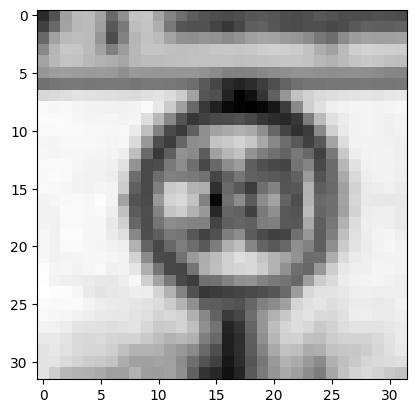

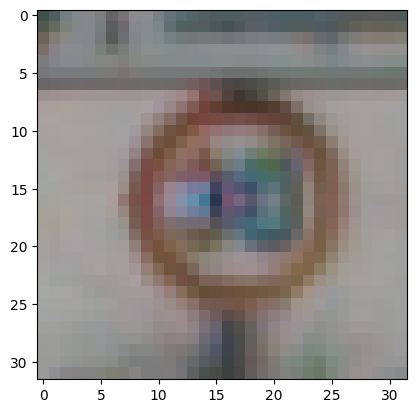

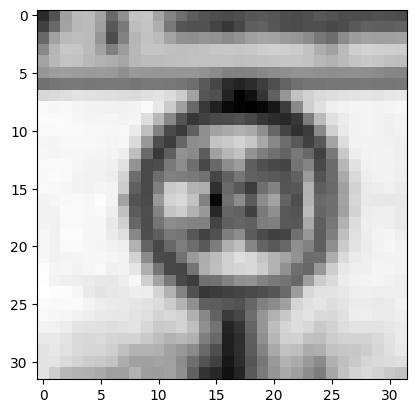

In [ ]:
i=600
plt.imshow(X_train_gray[i].squeeze(),cmap='gray') #Squeezes the data to display it as a 32x32 image
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

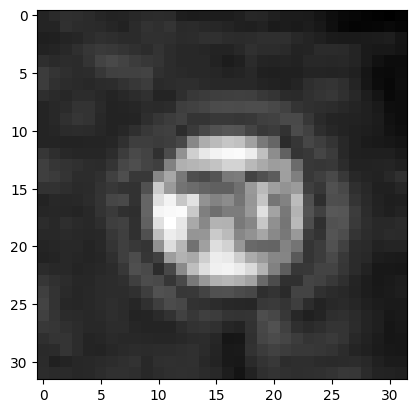

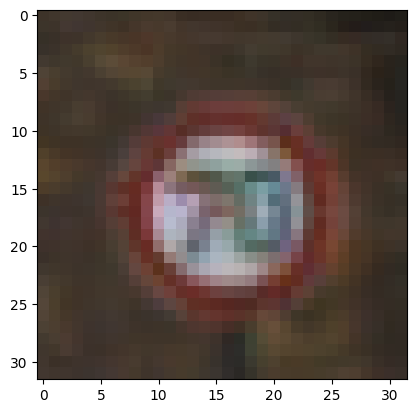

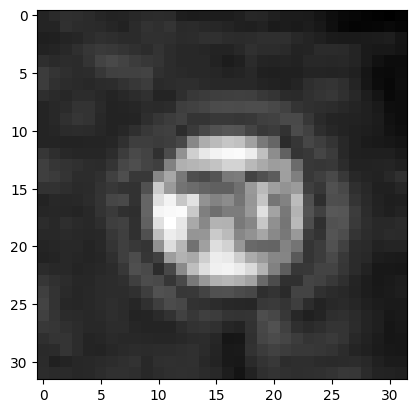

In [ ]:
i=np.random.randint(1,1000)
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')

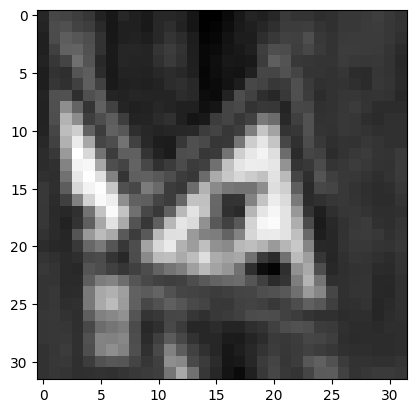

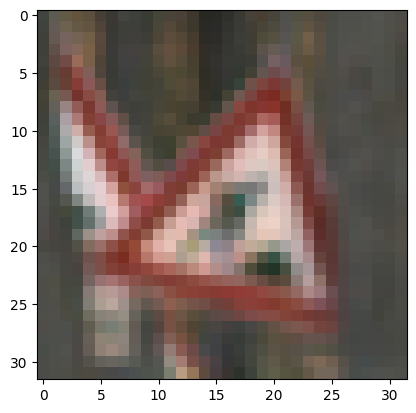

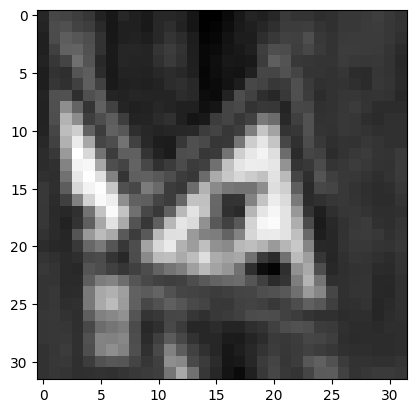

In [ ]:
i=np.random.randint(1,1000)
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')

In [ ]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [ ]:
y_train.shape

(34799,)

## **Model training**

Steps:

<b>Create convolution layer 1</b>
<ul>
<li>Input=32x32x1</li>
<li>Filter=5x5 with input depth of 5 and output depth of 6(kernel)
<li>Output=(Input-filter+1)/stride => (32-5+1)/1=28</li>
<li>Output=28x28x6</li>
<li>Forward this output to the pooling layer(shrink it by 2)</li>
<li>Therefore input for this=28x28x6 and output=14x14x6</li>
</ul>

*Stride is the amount by which kernel is shifted when it passes through the image

<b>Create convolution layer 2</b>
<ul>
<li>Input=14x14x6</li>
<li>Output=10x10x16(as output depth is 16)</li>
<li>Forward this to the pooling layer(shrink it by 2)</li>
<li>Therefore input=10x10x16 and output=5x5x16</li>
</ul>

<b>Flatten the output</b>

<ul>
<li>Flatten the network with input=5x5x16 and Output=400</li>
</ul>

<b>Fully Connected Layer 1</b>
<ul>
<li>Input=400, Output=120, apply RELU</li>
</ul>

<b>Fully Connected Layer 2</b>
<ul>
<li>Input=120,Output=84 apply RELU</li>
</ul>

<b>Fully Connected Layer 3</b>
<ul>
<li>Input=84 Output=43</li>
</ul>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard,EarlyStopping, ReduceLROnPlateau
from keras import regularizers

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1),kernel_regularizer=regularizers.l2(0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

#Adding fully connected layer

cnn_model.add(Dense(units=120,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5)) #Reduce chances of overfitting

cnn_model.add(Dense(units=84,activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))#Reduce chances of overfitting

cnn_model.add(Dense(units=43,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 10, 10, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 84)                  │             336 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,415 (255.53 KB)

 Trainable params: 64,963 (253.76 KB)

 Non-trainable params: 452 (1.77 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

#

hist=cnn_model.fit(X_train_gray_norm,y_train,epochs=100,batch_size=32,validation_data=(X_validation_gray_norm,y_validation),verbose=1)

Epoch 1/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0744 - loss: 4.2599 - val_accuracy: 0.3993 - val_loss: 2.4359
Epoch 2/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3270 - loss: 2.6591 - val_accuracy: 0.5578 - val_loss: 1.7335
Epoch 3/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4829 - loss: 1.9435 - val_accuracy: 0.6757 - val_loss: 1.2986
Epoch 4/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.5940 - loss: 1.4961 - val_accuracy: 0.7714 - val_loss: 0.9926
Epoch 5/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.6728 - loss: 1.1975 - val_accuracy: 0.8011 - val_loss: 0.8232
Epoch 6/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7340 - loss: 0.9765 - val_accuracy: 0.8429 - val_loss: 0.6303
Epoch 7/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7808 - loss: 0.8124 - val_accuracy: 0.8567 - val_loss: 0.5372
Epoch 8/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 

## **Model Evaluation**

In [ ]:
score=cnn_model.evaluate(X_test_gray_norm,y_test)
print("Accuracy",score[1])

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9526 - loss: 0.2271
Accuracy 0.9517022967338562


In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

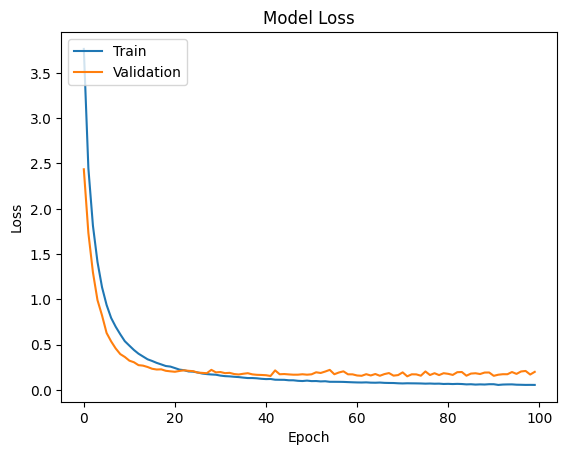

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
y_pred=cnn_model.predict(X_test_gray_norm)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Axes: >

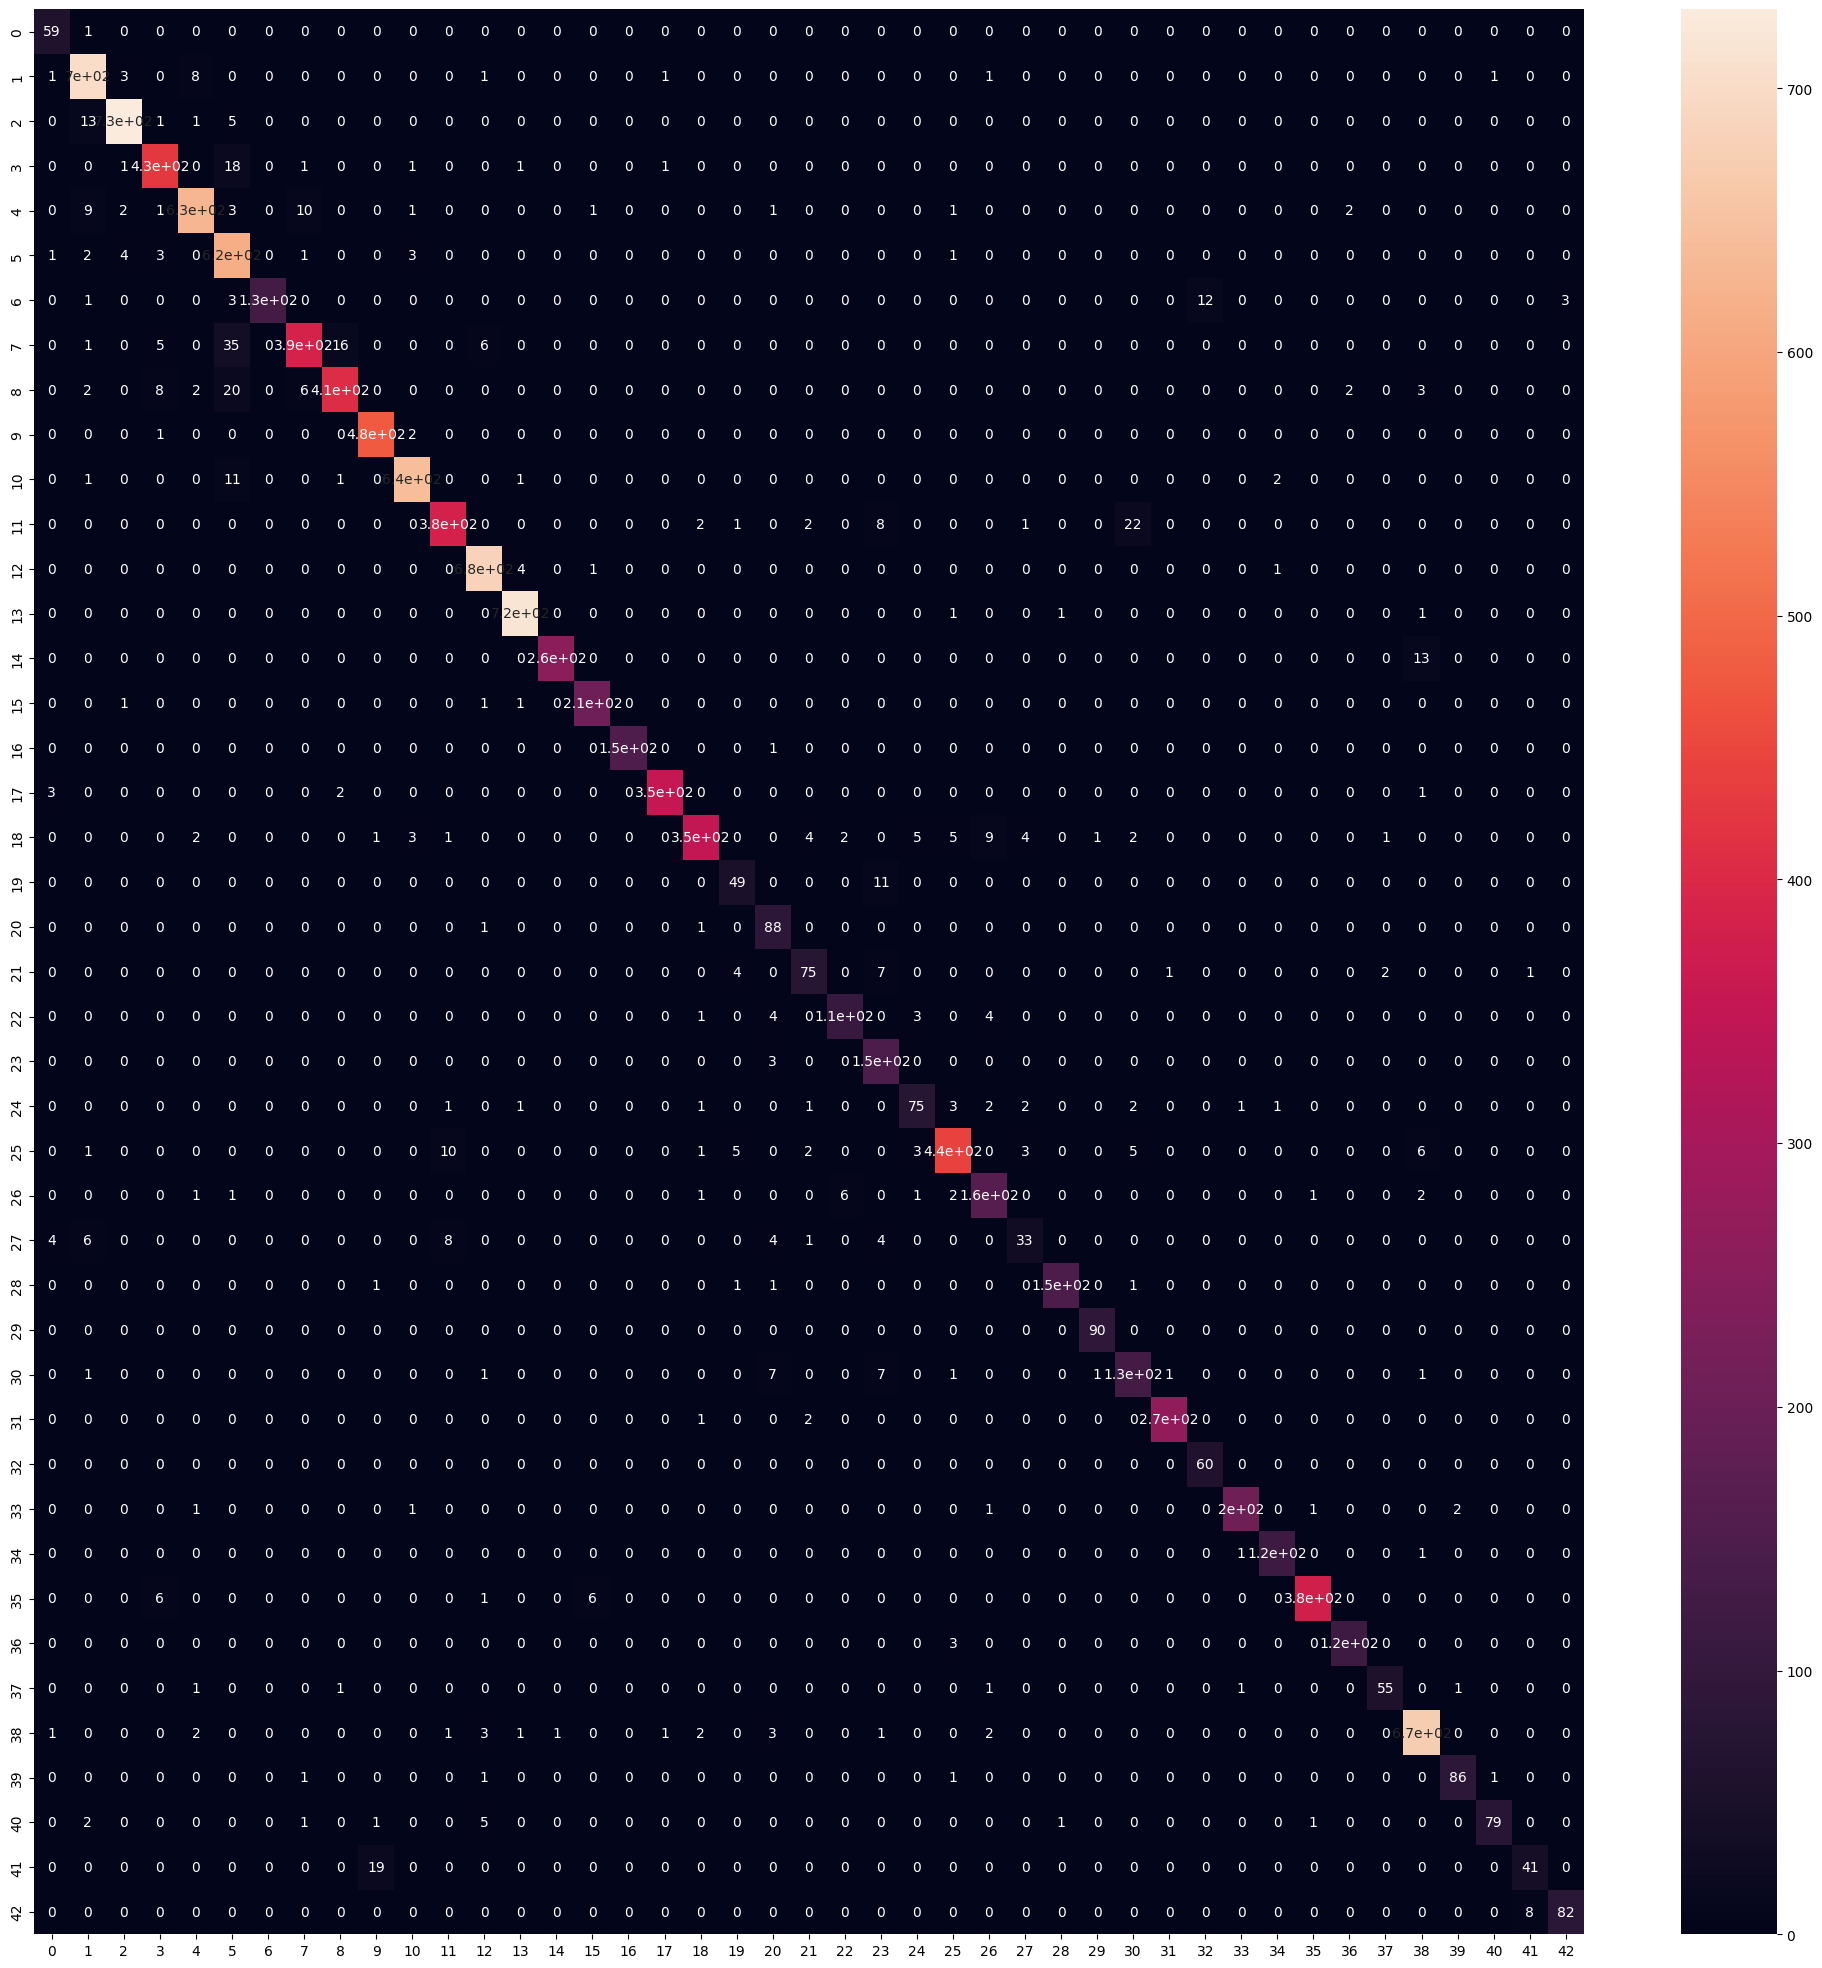

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix(y_test,np.argmax(y_pred,axis=1)),annot=True)

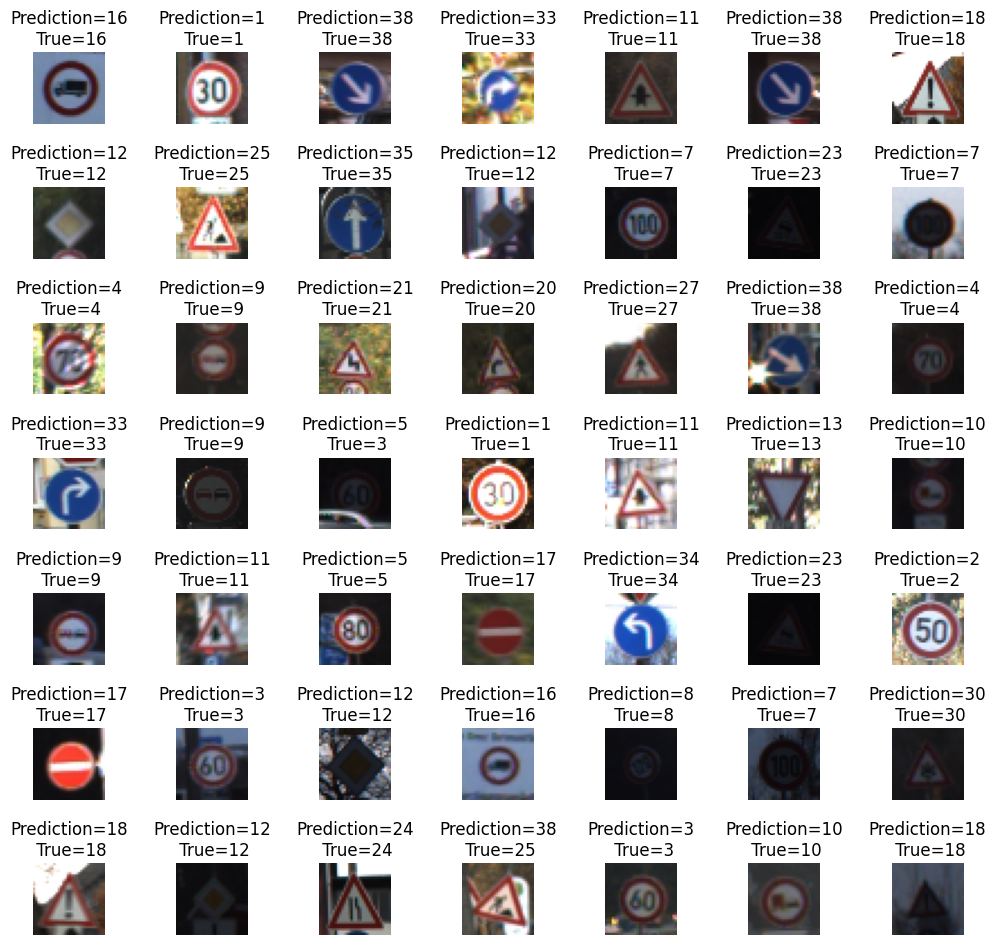

In [ ]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(np.argmax(y_pred,axis=1)[i],y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)